<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>



# <h1 align="center" id="heading">Phase I - Proof of Concept</h1>



## ☑️ Objectives
At the end of this session, you will have a brief understanding of how to:
- [ ] Find and run pre-trained models (Phase I)
- [ ] Evaluate results from pre-trained models (Phase I)
- [ ] Run a pre-trained model using real Reddit data (Phase I)


## 🛠️ Pre-Assignment
1. Create a virtual environment with 🐍 conda : `conda env create -f environment.yml`

2. Activate your conda virtual environment: `conda activate tsla_bot`

3. Create a .env file in the root directory and add the following variables:
4. 
   `STOCK_API_KEY` : API key from [twelvedata](https://twelvedata.com/pricing)

   `REDDIT_API_CLIENT_ID` : client ID of your reddit app
   
   `REDDIT_API_CLIENT_SECRET`: client secret of your reddit app
   
   Follow this tutorial to generate your own Reddit credentials:
   <https://www.jcchouinard.com/get-reddit-api-credentials-with-praw/>

4. Continue in this notebook



## Background


After the meeting with your boss, and reviewing your [notes](https://www.notion.so/Analyzing-Market-Sentiment-Phase-I-II-and-II-End-to-End-MLOps-with-Open-Source-Tools-dc4b846108b44f6bb2962d550368560c#54cc350bc95041ee873dabde36930af1) 📓, you're ready to get going on a Proof of Concept (POC)

A POC tests the validity of your hypothesis. It's a way to prove that your idea, task, app, or whatever else works!

There's no time to waste - you've got an idea - it's time to get testing it out! 🏁

### Step 1: Initial Imports and Variable Setting 📈

First things first: Let's set some variables that will help us going forward.

Though your boss suggested `"TSLA"`, you can use any active stock-symbol and subreddit!

**IMPORTANT**: Make sure you verify that your selected subreddit exists by navigating to the generated link after you run the following cell

In [ ]:
from datetime import datetime

### START CODE HERE

# Stock data to grab ex. "TSLA"
symbol = "TSLA"

# subreddit to check
subreddit = "teslainvestorsclub"

# Time interval granularity
# valid choices are "1week", "1month", "1day"
interval = "1day"

# set the beginning and end of the time range you'd like to analyze
# ensure you use the format "YYYY-MM-DD"
start_date = "2022-01-01"
end_date = "2022-07-01"

### END CODE HERE

start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")

print(f"reddit.com/r/{subreddit}")

reddit.com/r/teslainvestorsclub


In order to make sure we can import our `BotUtils.py`, we have to ensure we're running from the `TSLASentimentAnalyzer` folder. To do this, we can `cd` into that directory!

In [ ]:
# Instead of doing the above let's just add it to our PYTHONPATH!
import sys

sys.path.append("TSLASentimentAnalyzer")

### Step 2: Set Environment Variables ⛰️

Use the information you created in the instructions of the `README.md` to fill in the values below!

In [ ]:
# define env variables for configuration
import os

# os.environ["REDDIT_API_CLIENT_ID"] = ""
# os.environ["REDDIT_API_CLIENT_SECRET"] = ""
# os.environ["STOCK_DATA_API_KEY"] = ""

# Instead let's read from the .env file directly!
with open(".env") as env_file:
    for line in env_file:
        key, value = line.strip().split("=")
        if key and value:
            os.environ[key] = value

### Step 3: Get to Scraping 🌐

Now we're going to use the `scraper` module (found in the `TSLASentimentAnalyzer` folder) to "scrape" the subreddit of our choosing for posts!

⚗️ RESOURCES: 

[Web Scraping](https://www.parsehub.com/blog/what-is-web-scraping/)

[Reddit Post Options](https://www.reddit.com/r/help/comments/32eu8w/what_is_the_difference_between_newrising_hot_top/)

##### Initializing the Scraper

In [ ]:
import pandas as pd
from loguru import logger

from TSLASentimentAnalyzer.config import settings
from TSLASentimentAnalyzer.scraper import RedditScraper

# instantiating the reddit scraper
reddit = RedditScraper(subreddit)

##### Helper Functions 🔨

Here are some helper functions to assist in collecting data!

In [ ]:
from collections.abc import Callable


def load_comments(number: int, scraping_option: Callable) -> pd.DataFrame:
    """
    loads comments from reddit using the RedditScraper using one of the options
    and returns a DataFrame

    Parameters
    ----------
    number : int
        number of posts to load comments from

    scraping_options: callable
        expects a select_scrap_type function
    """
    comments = []
    for submission in scraping_option(number):
        comments.extend(reddit.get_comment_forest(submission.comments))
        logger.debug(
            submission.title,
            submission.num_comments,
            len(reddit.get_comment_forest(submission.comments)),
        )
    df = pd.DataFrame(comments)
    return df


def select_scrap_type(option: str) -> Callable:
    """
    selects a method from the reddit object based on a given option
    """
    if option == "Hot":
        return reddit.get_hot

    if option == "Rising":
        return reddit.get_rising

    if option == "New":
        return reddit.get_new

##### Loading & Processing the Reddit Comment Data

Let's scrape the 15 🔥 hottest 🔥 posts from your selected subreddit using the `load_data()` helper function!

In [ ]:
# Scraping data from reddit
dfReddit = load_comments(15, select_scrap_type("Hot"))

2022-07-09 16:31:14.267 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x294b7cb20>
2022-07-09 16:31:14.268 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x294b7cb20>
2022-07-09 16:31:14.269 | DEBUG    | __main__:load_comments:20 - Daily Thread - July 09, 2022
2022-07-09 16:31:27.389 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x177d7eb50>
2022-07-09 16:31:27.389 | INFO     | TSLASentimentAnalyzer.scraper:get_comment_forest:44 - more comments
2022-07-09 16:31:37.593 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <MoreComments count=1, children=['i7h9jhn']>
2022-07-09 16:31:37.594 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:45 - [{'comment': "Walked right into that one, no?  Where, precisely, was the government impeding anyone's spee

In [ ]:
dfReddit.head()

,comment,title,id,created_at,score
0,Alright ! Italy here I come 😀. Finished workin...,"Daily Thread - July 09, 2022",ifgcamx,1657356780,9
1,According to my local online retailer the chip...,"Daily Thread - July 09, 2022",ifgee3x,1657358557,8
2,Has anyone else received an email to verify th...,"Daily Thread - July 09, 2022",ifh2h1o,1657374796,3
3,The Elon Musk tweet about creating a super leg...,"Daily Thread - July 09, 2022",ifg4qjn,1657350611,9
4,I feel as though I’m starting to see a lot mor...,"Daily Thread - July 09, 2022",ifhcyoe,1657379624,1


Once we have our comments, let's use the [`pandas.Series.str.slice()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) method to ensure our data will play nicely with our model. (`bert` only supports up to a maximum of 512 tokens, so a range of `0` to `512` seems appropriate)

In [ ]:
# slice comments as bert supports only 512 tokens
dfReddit["comment"] = dfReddit["comment"].str.slice(0, 512)

### Step 5: Analyze the Comments! 🔍


We'll be using the `FourthBrain/bert_model_reddit_tsla` model (found [here](https://huggingface.co/FourthBrain/bert_model_reddit_tsla)), which is based off of the `distilbert-base-uncased` (found [here](https://huggingface.co/distilbert-base-uncased))

We'll use this model in a `sentiment-analysis` pipeline! (read all about that [here](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline.example))

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# initialize the sentiment pipeline
tokenizer = AutoTokenizer.from_pretrained("FourthBrain/bert_model_reddit_tsla")
model = AutoModelForSequenceClassification.from_pretrained(
    "FourthBrain/bert_model_reddit_tsla"
)
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


reddit_json = sentiment_pipeline(dfReddit["comment"].tolist())

# Retrieve labels and scores
dfReddit["label"] = [reddit_json[i]["label"] for i in range(0, len(reddit_json))]
dfReddit["score"] = [reddit_json[i]["score"] for i in range(0, len(reddit_json))]

Next up, we'll want to perform the following steps

1. Convert the `created_at` column to the appropriate format and name it `'timestamp'`
2. Normalize the dates using the `NormalizeDates()` helper function

In [ ]:
from BotUtils import NormalizeDates

# Rename timestamp column
dfReddit = dfReddit.rename(columns={"created_at": "timestamp"})
dfReddit["timestamp"] = [datetime.fromtimestamp(dt) for dt in dfReddit["timestamp"]]

# Normalize Reddit sentiment data
dfReddit = NormalizeDates(dfReddit, timestamp_col="timestamp", interval=interval)

# Create a continous time series
dfTimeSeries = pd.DataFrame(dfReddit["timestamp"])

In [ ]:
dfReddit.head()

,comment,title,id,timestamp,score,label
288,This requires additional factory buildings to ...,Long-running Thread for Detailed Discussion,hyd1f5n,2022-02-25,0.882156,LABEL_0
319,>I think they will stop manually labeling soon...,Long-running Thread for Detailed Discussion,hyf4uxu,2022-02-25,0.762257,LABEL_1
318,This comment sounds like someone played teleph...,Long-running Thread for Detailed Discussion,hycp9lp,2022-02-25,0.979114,LABEL_0
39,It's high time that Joe Biden recognizes the s...,Long-running Thread for Detailed Discussion,hyev1tf,2022-02-25,0.960824,LABEL_1
40,How do you guys feel about fsd ? Is progress f...,Long-running Thread for Detailed Discussion,hyf3me6,2022-02-25,0.976247,LABEL_0


### Step 6: Get Stock Data 🚀

Next up, we're going to get the stock data and create a DataFrame - as well as normalize the dates, just like we did with the subreddit comment timestamps

In [ ]:
from BotUtils import GetStockData

# Get Stock Data
j, dfStockData = GetStockData(
    settings.stock_data_api_key,
    symbol=symbol,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
)
dfStockData = dfStockData[
    (dfStockData["timestamp"] >= start_date) & (dfStockData["timestamp"] <= end_date)
]

# Normalize stock price data
dfStockData = NormalizeDates(dfStockData, timestamp_col="timestamp", interval=interval)

### Step 7: Merge Sentiment and Stock Data 🧬

We've got some processing to do! 

In [ ]:
# Join time series df with stock price df and reddit df
dfSentiment = dfTimeSeries.merge(dfStockData, how="left", on="timestamp")
dfSentiment = dfSentiment.merge(dfReddit, how="left", on="timestamp")

# Filter down to only the columns that we'll be using
dfSentiment = dfSentiment[["timestamp", "close", "volume", "label", "score"]]

# Clean up NaNs for closing price, score, and labels
dfSentiment["close"] = dfSentiment["close"].fillna(0)
dfSentiment["score"] = dfSentiment["score"].fillna(0)
dfSentiment["label"] = dfSentiment["label"].fillna("NEUTRAL")
dfSentiment["label"] = ["NEGATIVE" for s in dfSentiment["label"] == "LABEL_0"]
dfSentiment["label"] = ["POSITIVE" for s in dfSentiment["label"] == "LABEL_1"]

# Convert close from string to float
dfSentiment["close"] = dfSentiment["close"].astype("float")

# Calculate weighted sentiment
dfSentiment["sentiment"] = [
    1 if sentiment == "POSITIVE" else 0 if sentiment == "NEUTRAL" else -1
    for sentiment in dfSentiment["label"].tolist()
]
dfSentiment["weighted_sentiment"] = dfSentiment["sentiment"] * dfSentiment["score"]

# Count only the POSITIVE and NEGATIVE labels (NEUTRAL is just a filler for missing dates)
dfSentiment["counter"] = [
    1 if sentiment == "POSITIVE" else 1 if sentiment == "NEGATIVE" else 0
    for sentiment in dfSentiment["label"].tolist()
]

# Group by to calculate Reddit post count and sentiment score (mean of weighted sentiment)
dfSentiment = (
    dfSentiment.groupby("timestamp")
    .agg(
        {"counter": "sum", "close": "max", "volume": max, "weighted_sentiment": "mean"}
    )
    .rename(
        columns={"sentiment": "count_posts", "weighted_sentiment": "sentiment_score"}
    )
    .reset_index()
)

In [ ]:
dfSentiment.head()

,timestamp,counter,close,volume,sentiment_score
0,2022-02-25,625,809.87000,25355900,0.893887
1,2022-02-26,9,0.00000,NaN,0.963553
2,2022-02-27,4,0.00000,NaN,0.879634
3,2022-02-28,256,870.42999,33002300,0.844588
4,2022-03-01,9,864.37000,24922300,0.778763


### Step 8: Final Computation 🖥️

In this last step, we're going to finish up some calculations:

1. Create the lags and percentage change for the closing stock price. 
2. Calculate the 3 month rolling average.

In [ ]:
# Create lags and %change for closing stock price
dfSentiment["close_lag1"] = dfSentiment["close"].shift(1)
dfSentiment["close_lag1"] = dfSentiment["close_lag1"].fillna(0)
dfSentiment["perc_change_close"] = (
    dfSentiment["close"] - dfSentiment["close_lag1"]
) / dfSentiment["close_lag1"]
dfSentiment["perc_change_close"] = dfSentiment["perc_change_close"].fillna(0)

dfSentiment["sentiment_score_lag1"] = dfSentiment["sentiment_score"].shift(1)
dfSentiment["sentiment_score_lag1"] = dfSentiment["sentiment_score_lag1"].fillna(0)
dfSentiment["perc_change_sentiment"] = (
    dfSentiment["sentiment_score"] - dfSentiment["sentiment_score_lag1"]
) / dfSentiment["sentiment_score_lag1"]

# Calculate 3 month rolling average
dfSentiment["sentiment_SMA3mo"] = dfSentiment.sentiment_score.rolling(3).mean()
dfSentiment["sentiment_SMA3mo"] = dfSentiment["sentiment_SMA3mo"].fillna(0)

dfSentiment = dfSentiment[1:]
dfSentiment

,timestamp,counter,close,volume,sentiment_score,close_lag1,perc_change_close,sentiment_score_lag1,perc_change_sentiment,sentiment_SMA3mo
1,2022-02-26,9,0.00000,NaN,0.963553,809.87000,-1.000000,0.893887,0.077935,0.000000
2,2022-02-27,4,0.00000,NaN,0.879634,0.00000,0.000000,0.963553,-0.087093,0.912358
3,2022-02-28,256,870.42999,33002300,0.844588,0.00000,inf,0.879634,-0.039841,0.895925
4,2022-03-01,9,864.37000,24922300,0.778763,870.42999,-0.006962,0.844588,-0.077938,0.834328
5,2022-03-02,64,879.89001,24881100,0.870155,864.37000,0.017955,0.778763,0.117356,0.831169
...,...,...,...,...,...,...,...,...,...,...
99,2022-07-04,9,0.00000,NaN,0.911184,0.00000,0.000000,0.864599,0.053881,0.843880
100,2022-07-05,9,0.00000,NaN,0.743754,0.00000,0.000000,0.911184,-0.183750,0.839846
101,2022-07-07,4,0.00000,NaN,0.769484,0.00000,0.000000,0.743754,0.034595,0.808141
102,2022-07-08,107584,0.00000,NaN,0.882072,0.00000,0.000000,0.769484,0.146316,0.798437


Let's save our work in a `.csv` for use later in the Streamlit app!

In [ ]:
# Save DataFrame locally (or somewhere else) for use in Streamlit app
dfSentiment.to_csv("./sentiment_data.csv")

### Step 8a: Plotting our Results! 📊

Now, after all that, let's plot our results and see how they shape up!

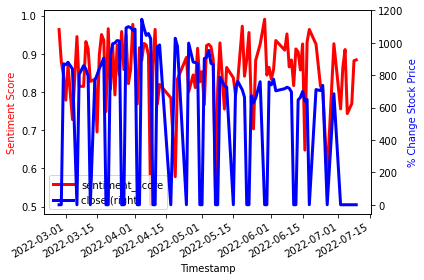

In [ ]:
import matplotlib.pyplot as plt

ax1 = dfSentiment.plot(
    kind="line", x="timestamp", y="sentiment_score", color="Red", linewidth=3
)

ax2 = dfSentiment.plot(
    kind="line",
    x="timestamp",
    y="close",
    secondary_y=True,
    color="Blue",
    linewidth=3,
    ax=ax1,
)

# labeling x and y-axis
ax1.set_xlabel("Timestamp", color="black")
ax1.set_ylabel("Sentiment Score", color="r")
ax2.set_ylabel("% Change Stock Price", color="b")

# defining display layout
plt.tight_layout()

# show plot
plt.show()